In [ ]:
#dependencies
import requests
import pandas as pd 
from config import fred_key, nasdaq_key #, bls_key
import json
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
# import folium   
# from folium import plugins
import traceback
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = nasdaq_key
import os
# API keys obtained from  https://fred.stlouisfed.org/docs/api/fred/ and https://www.bls.gov/developers/home.htm and https://data.nasdaq.com/ using nasdaqdatalink lib is a bit easier, documentation is here https://pypi.org/project/Nasdaq-Data-Link/

In [ ]:

# IDs of different data sets in percentages, using MORTGAGE observation as the other ones do not look relatable
# MORTGAGE30US  Interest rate in percentage per year. 
# EXHOSLUSM495S Existing home sales 
# GINIALLRH  Income Gini Ratio for Households by Race of Householder, All Races
# GINIALLRH Income Gini Ratio for Households by Race of Householder, All Races
# T10YIE Inflation
# UNRATE UNEMPLOYMENT RATE. 
# RIFLGFLXIINA reasury Long-Term Average (Over 10 Years), Inflation-Indexed
filePath = "./Resources/mortgage_interest_rates_fred.csv"
if not os.path.isfile(filePath):
    url = "https://api.stlouisfed.org/fred/series/observations?series_id=MORTGAGE30US&observation_start=2010-01-01&observation_end=2021-12-31&frequency=m&file_type=json&api_key=" + fred_key
    res = requests.get(url)
    fred_data = json.loads(res.text)  #reuturns the interest rate per year 
    fred_data = pd.DataFrame.from_dict(fred_data['observations'])
else:
    fred_data = pd.read_csv(filePath)
# interest Rate mortgate per year need to get the MEAN per year to match the data from 2010 to 2021 and make a correlation against other sets like inflation, and interest rates for the graphs.  




fred_data.to_csv(filePath)
fred_data

In [ ]:
# BLS.GOV API 
# 'CUUR0000SA0',  onsumer Price Index - All Urban Consumers
# 'SUUR0000SA0',  Chained CPI-All Urban Consumers
#  'CEU0800000003',  Employment & Unemployment
#  'APU000070111',  Inflation & Prices
# FPCPITOTLZGUSA  Inflation, consumer prices for the United States 

# 5-Year 0.625% Treasury Inflation-Indexed Note, Due 4/15/2023 (DTP5A23)


''' 
After checking various data sets, It think that creating a correlaton of inflation vs interes rates or 

Interest rates and inflation tend to move in the same direction – when inflation is increasing, 
banks will increase interest rates to encourage people to spend less and save more.
In theory, this should reduce demand for goods and services, which helps to contain inflation.

How are inflation and unemployment related?
Inflation has historically had an inverse relationship with unemployment.
This means that when inflation rises, unemployment drops. Higher unemployment, on the other hand, equates to lower inflation.
'''
# res_json['Results']['series'][0]['data']  so [x for x in res_json['Results']['series'][x]['data] ]
'''
What is the Consumer Price Index? The Consumer Price Index (CPI), produced by the Bureau of Labor Statistics (BLS), 
is the most widely used measure of inflation. The primary CPI (CPI-U) .
is designed to measure price changes faced by urban consumers, who represent 93% of the U.S. population.

'''
filePath2 = "./Resources/mortgage_interest_rates.csv"
if not os.path.isfile(filePath2):
    data = json.dumps({"seriesid": ['CEU0800000003'],"startyear":"2010", "endyear":"202"}) #
    response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers={'Content-type': 'application/json'})
    res_json = json.loads(response.text)
    bls_pd = pd.DataFrame([x for x in res_json['Results']['series'][0]['data']])   
    bls_pd.drop(['period', 'footnotes'], axis=1, inplace=True)
else:
    bls_pd = pd.read_csv(filePath2)









bls_pd.to_csv("./Resources/mortgage_interest_rates.csv")
bls_pd

In [ ]:
# Gross domestic product is the monetary value of all finished goods and services made within a country during a specific period.
# GDP provides an economic snapshot of a country, used to estimate the size of an economy and its growth rate

filePath3 = "./Resources/gdp.csv"
if not os.path.isfile(filePath3):
    data = nasdaqdatalink.get("FRED/GDPM", start_date="2010-01-01", end_date="2021-12-31") 
    gdp_df = pd.DataFrame(data)
    gdp_df.to_csv("./Resources/gdp.csv")
else:
    gdp_df = pd.read_csv(filePath3)
# WE HAVE TO GROUPBY MEAN PER YEAR SO WE GET THE AVERAGE PER YEAR FROM 2010 to 2021 which is all that is available 

gdp_df.to_csv("./Resources/gdp.csv")
gdp_df

In [ ]:
filePath5 = "./Resources/unemployment.csv"
if not os.path.isfile(filePath5):
    unemploymentRateData = nasdaqdatalink.get("FRED/UNRATE", start_date="2010-01-01", end_date="2021-12-31")
    # unemploymentRateData
    unplmnt_pd = pd.DataFrame(unemploymentRateData)
else:
    unplmnt_pd = pd.read_csv(filePath5)

    

unplmnt_pd.to_csv("./Resources/unemployment.csv")
unplmnt_pd

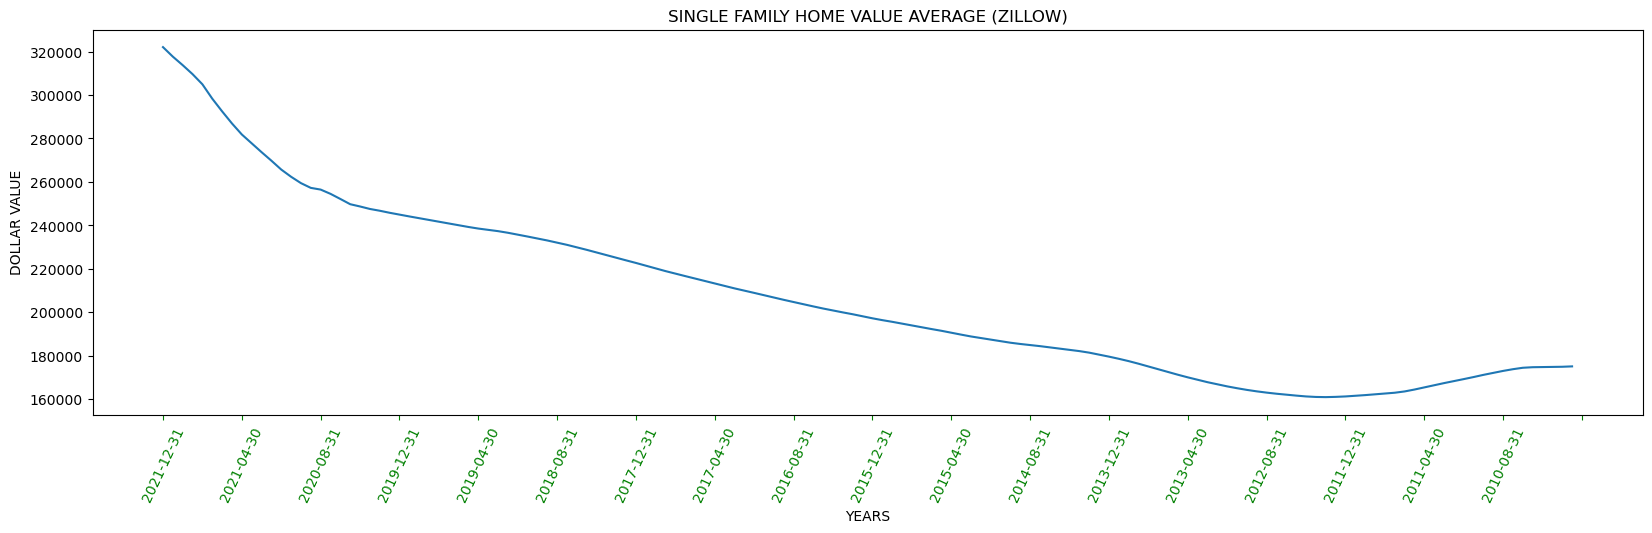

In [57]:
# res
''' 

HOME VALUES INDICATOR we are using is the Single Family Home value ZSFH 

XHVI All Home - Top tier 
The USA region code will always be 102001

'''
filePath4 = "./Resources/zillosSFH.csv"
if not os.path.isfile(filePath4):
    zurl = "https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=102001&api_key=" + nasdaq_key
    zres = requests.get(zurl)
    zjson = json.loads(zres.text)
    zjson_pd = pd.DataFrame(zjson['datatable']['data'])
    zjson_pd.to_csv("./Resources/zillosSFH.csv")
else:
    zjson_pd = pd.read_csv(filePath4)

zjson_pd = zjson_pd.rename({"2":"date", "3":"value"}, axis=1)
zjson_pd = zjson_pd[['date', 'value']]
zjson_pd = zjson_pd[(zjson_pd['date'] > '2009-12-31') & (zjson_pd['date'] <= '2021-12-31')]

fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('SINGLE FAMILY HOME VALUE AVERAGE (ZILLOW)')
ax.set_xlabel('YEARS')
ax.set_ylabel('DOLLAR VALUE')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.plot(zjson_pd['date'], zjson_pd['value'])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/zillow_SFH_val.png")

